In [68]:
import pandas as pd
import yfinance as yf


# EXTRAEMOS DATOS DE YAHOO FINANCE

EXTRAEMOS LA INFORMACION DE LOS ACTIVOS USANDO LA LIBRERIA DE YAHOO FINANCE DE 2020-01-01",to="2024-12-31

In [69]:
tickers=['SHEL','CVX','BKR','NKE','SAM','FORD','GOOG','DELL','AMZN','MRVL','GOVT','TLT','IBTA.L','IEF','IEI','SHY']

In [70]:
df = yf.download(tickers, start="2020-01-01", end="2024-12-31",auto_adjust=False,interval='1d')
#df=pd.DataFrame(data)
#df.head()
df.head()

[*********************100%***********************]  16 of 16 completed


Price       Adj Close                                                    \
Ticker           AMZN        BKR        CVX       DELL  FORD       GOOG   
Date                                                                      
2020-01-02  94.900497  21.962616  96.158684  24.481895  10.1  68.046204   
2020-01-03  93.748497  21.988344  95.826096  23.676605  10.0  67.712280   
2020-01-06  95.143997  21.885433  95.501434  23.915380  10.3  69.381874   
2020-01-07  95.343002  21.516678  94.281929  23.316095  10.2  69.338585   
2020-01-08  94.598503  21.242256  93.204956  23.409733  10.3  69.884995   

Price                                                 ...     Volume  \
Ticker           GOVT  IBTA.L        IEF         IEI  ...       GOVT   
Date                                                  ...              
2020-01-02  23.096600  5.2520  98.705231  114.154953  ...  4774300.0   
2020-01-03  23.212145  5.2560  99.364876  114.517479  ...  2830000.0   
2020-01-06  23.185476  5.2530  99.257912  114.454002  ...  5352700.0   
2020-01-07  23.141045  5.2580  99.115265  114.408707  ...  4796600.0   
2020-01-08  23.105501  5.2545  98.883522  114.254654  ...  6174900.0   

Price                                                                       \
Ticker        IBTA.L        IEF       IEI        MRVL        NKE       SAM   
Date                                                                         
2020-01-02  175688.0  4022300.0  555900.0   6503200.0  5644100.0  122000.0   
2020-01-03  176247.0  3839600.0  673300.0   9732300.0  4541800.0  122500.0   
2020-01-06  605939.0  2714300.0  363500.0  10432100.0  4612400.0   87700.0   
2020-01-07  961275.0  2038800.0  410100.0   7493800.0  6719900.0  177300.0   
2020-01-08  986588.0  5081100.0  935300.0   7860800.0  4942200.0  124800.0   

Price                                         
Ticker           SHEL        SHY         TLT  
Date                                          
2020-01-02  3085246.0  2665200.0  11034100.0  
2020-01-03  3713515.0  2039900.0  12366000.0  
2020-01-06  3250736.0  1132100.0  11369800.0  
2020-01-07  2683199.0  1103400.0   8381200.0  
2020-01-08  2966175.0  1864300.0  10621700.0  

[5 rows x 96 columns]

In [71]:
BKR_Adj_Close=df['Adj Close','BKR'].head()
BKR_Adj_Close.head()


Date
2020-01-02    21.962616
2020-01-03    21.988344
2020-01-06    21.885433
2020-01-07    21.516678
2020-01-08    21.242256
Name: (Adj Close, BKR), dtype: float64

In [72]:
BKR_Close=df['Close','BKR'].head()
BKR_Close.head()

Date
2020-01-02    25.610001
2020-01-03    25.639999
2020-01-06    25.520000
2020-01-07    25.090000
2020-01-08    24.770000
Name: (Close, BKR), dtype: float64

In [73]:
#df_merged=pd.DataFrame(BKR_Adj_Close,BKR_Close)

df_merged=pd.DataFrame({'BKR_Adj_Close': BKR_Adj_Close, 'BKR_Close': BKR_Close})

df_merged.head()

,BKR_Adj_Close,BKR_Close
Date,,
2020-01-02,21.962616,25.610001
2020-01-03,21.988344,25.639999
2020-01-06,21.885433,25.520000
2020-01-07,21.516678,25.090000
2020-01-08,21.242256,24.770000


# ADJ CLOSE

---

### ✅ ¿Qué es `'Adj Close'` en `yfinance`?

`'Adj Close'` significa **"Precio de Cierre Ajustado"**.

Es el **precio real que refleja el valor de una acción considerando eventos como:**

- **Splits** (divisiones de acciones)
- **Dividendos**
- **Reinversiones**
- **Fusiones o escisiones**

---

### 🍕 Ejemplo simple:

Supón que compras una acción en **$100**, y luego la empresa hace un split 2:1.  
Ahora cada acción vale **$50**, pero tú tienes el doble.

El **precio de cierre real** fue $100,  
pero el **"precio ajustado"** dirá $50 para que todo el historial tenga **coherencia** y sea comparable.

---

### 🧮 ¿Cómo se calcula?

El **precio ajustado** lo calcula Yahoo Finance (no tú directamente). Lo que hace es:

```python
Adj Close = Close × Factor de ajuste
```

Donde el **factor de ajuste** considera:

- Cuántos dividendos se pagaron (y cuándo)
- Si hubo splits (por cuántas acciones se dividió)
- Otros ajustes corporativos

---

### 🧠 ¿Por qué es importante usar `Adj Close`?

Usa `Adj Close` cuando:

- Quieres analizar el **crecimiento real** de una acción en el tiempo.
- Estás calculando **rendimientos históricos** o estrategias de inversión a largo plazo.

Porque si solo usas `Close`, podrías pensar que una acción bajó de precio después de un split… ¡cuando en realidad no perdiste dinero!

---

### 📊 Ejemplo rápido en código:

```python
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
adj_close = data["Adj Close"]

print(adj_close.head())
```

---

¿Quieres que hagamos un gráfico comparando `Close` vs `Adj Close` para que lo veas visualmente?

In [74]:
df_Adj_close=df['Adj Close']

In [75]:
df_Adj_close.head()

Ticker,AMZN,BKR,CVX,DELL,FORD,GOOG,GOVT,IBTA.L,IEF,IEI,MRVL,NKE,SAM,SHEL,SHY,TLT
Date,,,,,,,,,,,,,,,,
2020-01-02,94.900497,21.962616,96.158684,24.481895,10.1,68.046204,23.096600,5.2520,98.705231,114.154953,26.706511,96.001991,371.119995,48.650616,76.075546,118.909431
2020-01-03,93.748497,21.988344,95.826096,23.676605,10.0,67.712280,23.212145,5.2560,99.364876,114.517479,26.013979,95.738983,367.700012,49.033360,76.138428,120.740685
2020-01-06,95.143997,21.885433,95.501434,23.915380,10.3,69.381874,23.185476,5.2530,99.257912,114.454002,25.048326,95.654419,371.570007,49.644150,76.111488,120.055107
2020-01-07,95.343002,21.516678,94.281929,23.316095,10.2,69.338585,23.141045,5.2580,99.115265,114.408707,25.604305,95.607430,373.880005,49.188107,76.111488,119.464890
2020-01-08,94.598503,21.242256,93.204956,23.409733,10.3,69.884995,23.105501,5.2545,98.883522,114.254654,25.409225,95.391418,373.380005,48.609886,76.075546,118.675110


# REORDENAMOS LAS COLUMNAS 

PRIMERO LOS ACTIVOS DE RENTA VARIABLE Y DEPSUES LOS DE RENTA FIJA ETFS

In [76]:
column_order=['SHEL','CVX','BKR','NKE','SAM','FORD','GOOG','DELL','AMZN','MRVL','GOVT','TLT','IBTA.L','IEF','IEI','SHY']

In [77]:
df_Adj_close=df_Adj_close[column_order]


df_Adj_close.head()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,
2020-01-02,48.650616,96.158684,21.962616,96.001991,371.119995,10.1,68.046204,24.481895,94.900497,26.706511,23.096600,118.909431,5.2520,98.705231,114.154953,76.075546
2020-01-03,49.033360,95.826096,21.988344,95.738983,367.700012,10.0,67.712280,23.676605,93.748497,26.013979,23.212145,120.740685,5.2560,99.364876,114.517479,76.138428
2020-01-06,49.644150,95.501434,21.885433,95.654419,371.570007,10.3,69.381874,23.915380,95.143997,25.048326,23.185476,120.055107,5.2530,99.257912,114.454002,76.111488
2020-01-07,49.188107,94.281929,21.516678,95.607430,373.880005,10.2,69.338585,23.316095,95.343002,25.604305,23.141045,119.464890,5.2580,99.115265,114.408707,76.111488
2020-01-08,48.609886,93.204956,21.242256,95.391418,373.380005,10.3,69.884995,23.409733,94.598503,25.409225,23.105501,118.675110,5.2545,98.883522,114.254654,76.075546


# Limpiamos los datos NA interpolando

In [78]:
print(df_Adj_close.isna().any())


Ticker
SHEL      True
CVX       True
BKR       True
NKE       True
SAM       True
FORD      True
GOOG      True
DELL      True
AMZN      True
MRVL      True
GOVT      True
TLT       True
IBTA.L    True
IEF       True
IEI       True
SHY       True
dtype: bool


In [79]:
print(df_Adj_close.isna().sum())

Ticker
SHEL      30
CVX       30
BKR       30
NKE       30
SAM       30
FORD      30
GOOG      30
DELL      30
AMZN      30
MRVL      30
GOVT      30
TLT       30
IBTA.L    26
IEF       30
IEI       30
SHY       30
dtype: int64


In [80]:
print(df_Adj_close.isna().any().any())

True


# INTERPOLAMOS PARA ELIMINAR LOS NA DEL DATAFRAME

In [81]:
# Interpolar valores NA
df_Adj_close = df_Adj_close.interpolate(method='linear', axis=0)

In [82]:
# COMPROBAMOS QUE SE HAYAN ELIMINADO LOS DATOS NA
df_Adj_close.isna().any()

Ticker
SHEL      False
CVX       False
BKR       False
NKE       False
SAM       False
FORD      False
GOOG      False
DELL      False
AMZN      False
MRVL      False
GOVT      False
TLT       False
IBTA.L    False
IEF       False
IEI       False
SHY       False
dtype: bool

EMPEZAMOS A REALIZAR CAMBIOS PORCENTUALES CON ENFOQUE LOGARITMICO

Explicación:

np.log(df_Adj_close): Calcula el logaritmo natural de los precios.

.diff(): Calcula las diferencias entre valores consecutivos (rendimientos logarítmicos).

.dropna(): Elimina las filas con valores NaN que aparecen debido a la primera diferencia (la primera fila no tiene un valor anterior para calcular la diferencia).


# TRANSFORMAMOS LOS VALORES A RENDIMIENTOS PORCENTUALES Y APLIACAMOS LOGARTIMO PARA SUAVIZAR 

rendimiento porcentual= (rendimiento(1)-rendimiento(0))/rendimiento(0)

In [83]:
import numpy as np 

# Calcular los rendimientos logarítmicos y eliminar valores NA
ret_assets = np.log(df_Adj_close).diff().dropna()

# Mostrar los primeros valores
print(ret_assets.head())


Ticker          SHEL       CVX       BKR       NKE       SAM      FORD  \
Date                                                                     
2020-01-03  0.007836 -0.003465  0.001171 -0.002743 -0.009258 -0.009950   
2020-01-06  0.012380 -0.003394 -0.004691 -0.000884  0.010470  0.029559   
2020-01-07 -0.009229 -0.012852 -0.016993 -0.000491  0.006198 -0.009756   
2020-01-08 -0.011825 -0.011489 -0.012836 -0.002262 -0.001338  0.009756   
2020-01-09 -0.000167 -0.001616  0.010841 -0.000690 -0.010500  0.009662   

Ticker          GOOG      DELL      AMZN      MRVL      GOVT       TLT  \
Date                                                                     
2020-01-03 -0.004919 -0.033446 -0.012213 -0.026273  0.004990  0.015283   
2020-01-06  0.024358  0.010034  0.014776 -0.037827 -0.001150 -0.005694   
2020-01-07 -0.000624 -0.025378  0.002089  0.021953 -0.001918 -0.004928   
2020-01-08  0.007849  0.004008 -0.007839 -0.007648 -0.001537 -0.006633   
2020-01-09  0.010984 -0.007629  0.004

¡Excelente pregunta! 👏 Esa transformación:

```python
ret_assets = np.log(df_Adj_close).diff().dropna()
```

se usa muy comúnmente en **finanzas cuantitativas** y te voy a explicar **paso a paso y con analogía de niño** por qué se hace.

---

### 🧠 Objetivo: Calcular los **rendimientos logarítmicos** de los precios ajustados.

---

## 👶 Explicación como si fueras un niño:

Imagina que los precios de tus dulces favoritos (o acciones) cambian cada día.

- Un día cuesta $10, al otro día cuesta $11.
- ¿Qué tanto subió? Eso es el **rendimiento** 📈

---

### 1️⃣ `np.log(df_Adj_close)`  
👉 Esto convierte los precios en **logaritmos naturales**.

💡 ¿Por qué usar logaritmos?

Porque te permiten comparar cambios de forma más limpia y tienen propiedades matemáticas útiles:

- Te permiten sumar rendimientos en lugar de multiplicar precios.
- Hacen que los cambios relativos (porcentaje) se comporten de forma **simétrica**.

---

### 2️⃣ `.diff()`  
👉 Esto calcula la **diferencia entre un día y el anterior**.

En vez de hacer:

```python
(t1 - t0) / t0  # rendimiento porcentual
```

con logaritmos haces:

```python
log(t1) - log(t0) = log(t1 / t0)
```

📌 ¡Es lo mismo que un rendimiento porcentual, pero en forma logarítmica!

---

### 3️⃣ `.dropna()`  
👉 Esto elimina el primer valor vacío (porque no hay día anterior para comparar).

---

### 🧮 Resultado final:

`ret_assets` es un DataFrame donde cada fila te dice:

> “¿Cuánto cambió el precio **(en forma logarítmica)** con respecto al día anterior?”

---

### 📊 ¿Por qué es útil?

- Es más preciso para modelos financieros.
- Sirve para análisis estadístico (media, volatilidad, correlaciones).
- Es la forma preferida en modelos como CAPM, portafolios de Markowitz, etc.

---

¿Te gustaría que te muestre cómo calcular la media y la volatilidad de esos rendimientos también? 📉📊

¡Claro! 😊

Un **histograma** es como un gráfico de barras que cuenta cosas. Imagina que tienes una caja llena de dulces de diferentes tamaños. Quieres saber cuántos dulces hay de cada tamaño. Entonces:

1. **Divides los tamaños en grupos** (por ejemplo, pequeños, medianos y grandes).
2. **Cuentas cuántos dulces hay en cada grupo**.
3. Dibujas una barra para cada grupo:
   - La barra es más alta si hay muchos dulces en ese grupo.
   - La barra es más baja si hay pocos dulces.

El histograma te ayuda a ver rápidamente cómo están distribuidos los tamaños de los dulces. En lugar de dulces, en matemáticas o programación, usamos números, como edades, precios o cualquier dato que queramos analizar.

¿Te gustaría que te muestre cómo hacer uno con tus datos? 😊

¡Claro! 😊

Un **histograma** es como un gráfico de barras que cuenta cosas. Imagina que tienes una caja llena de dulces de diferentes tamaños. Quieres saber cuántos dulces hay de cada tamaño. Entonces:

1. **Divides los tamaños en grupos** (por ejemplo, pequeños, medianos y grandes).
2. **Cuentas cuántos dulces hay en cada grupo**.
3. Dibujas una barra para cada grupo:
   - La barra es más alta si hay muchos dulces en ese grupo.
   - La barra es más baja si hay pocos dulces.

El histograma te ayuda a ver rápidamente cómo están distribuidos los tamaños de los dulces. En lugar de dulces, en matemáticas o programación, usamos números, como edades, precios o cualquier dato que queramos analizar.

¿Te gustaría que te muestre cómo hacer uno con tus datos? 😊

EMPEZAMOS A GRAFICAR LAS LINEAS

In [84]:

nike_adj=df_Adj_close['NKE']
nike_adj.head()


nike_ret=ret_assets['NKE']
nike_ret.head()





Date
2020-01-03   -0.002743
2020-01-06   -0.000884
2020-01-07   -0.000491
2020-01-08   -0.002262
2020-01-09   -0.000690
Name: NKE, dtype: float64

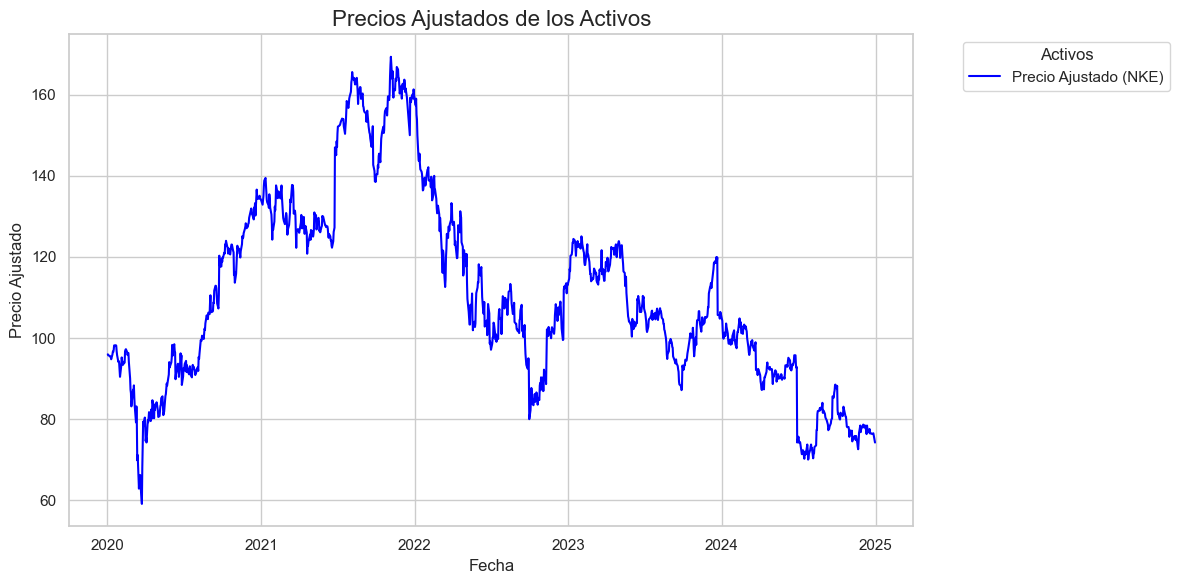

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_Adj_close['NKE'], label="Precio Ajustado (NKE)", color="blue")

# Personalizar el gráfico
plt.title("Precios Ajustados de los Activos", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Ajustado", fontsize=12)
plt.legend(title="Activos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

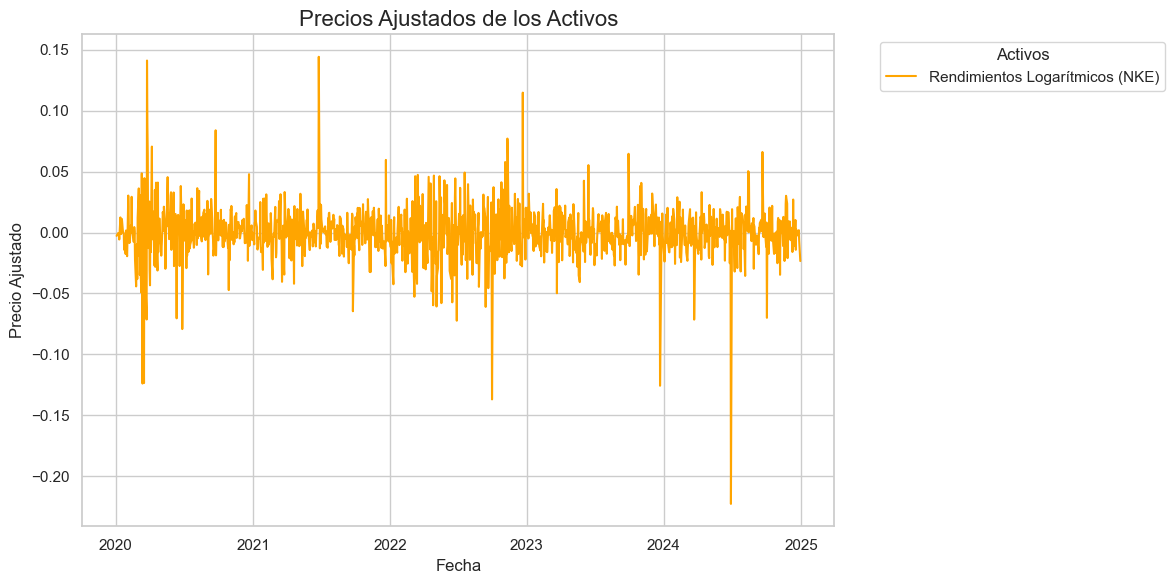

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(ret_assets['NKE'], label="Rendimientos Logarítmicos (NKE)", color="orange")


# Personalizar el gráfico
plt.title("Precios Ajustados de los Activos", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Ajustado", fontsize=12)
plt.legend(title="Activos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [87]:
ret_assets.corr()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
Ticker,,,,,,,,,,,,,,,,
SHEL,1.000000,0.786246,0.676496,0.319323,0.152133,0.103646,0.305491,0.344116,0.156181,0.257816,-0.188283,-0.191921,-0.081394,-0.158652,-0.120928,-0.085698
CVX,0.786246,1.000000,0.746967,0.353784,0.193377,0.094336,0.330999,0.358140,0.166303,0.269322,-0.189086,-0.190867,-0.105201,-0.164555,-0.134050,-0.094483
BKR,0.676496,0.746967,1.000000,0.318493,0.141296,0.116757,0.305273,0.345508,0.178655,0.265143,-0.177064,-0.182701,-0.091697,-0.151623,-0.124332,-0.104124
NKE,0.319323,0.353784,0.318493,1.000000,0.272554,0.053989,0.451217,0.349687,0.404269,0.383497,-0.040942,-0.053748,-0.008267,-0.026250,-0.008062,0.013321
SAM,0.152133,0.193377,0.141296,0.272554,1.000000,0.069390,0.290180,0.174464,0.322224,0.274143,-0.002739,-0.020431,-0.022265,0.011572,0.034450,0.047154
FORD,0.103646,0.094336,0.116757,0.053989,0.069390,1.000000,0.149632,0.079200,0.149672,0.119460,0.002352,-0.000937,0.041703,0.004642,0.013081,0.025968
GOOG,0.305491,0.330999,0.305273,0.451217,0.290180,0.149632,1.000000,0.399947,0.653005,0.516157,-0.041042,-0.068862,-0.001942,-0.015941,0.016168,0.050196
DELL,0.344116,0.358140,0.345508,0.349687,0.174464,0.079200,0.399947,1.000000,0.371159,0.504757,-0.118112,-0.104370,-0.057526,-0.087812,-0.074385,-0.056672
AMZN,0.156181,0.166303,0.178655,0.404269,0.322224,0.149672,0.653005,0.371159,1.000000,0.543533,0.021744,-0.000034,0.029497,0.046974,0.069881,0.086499


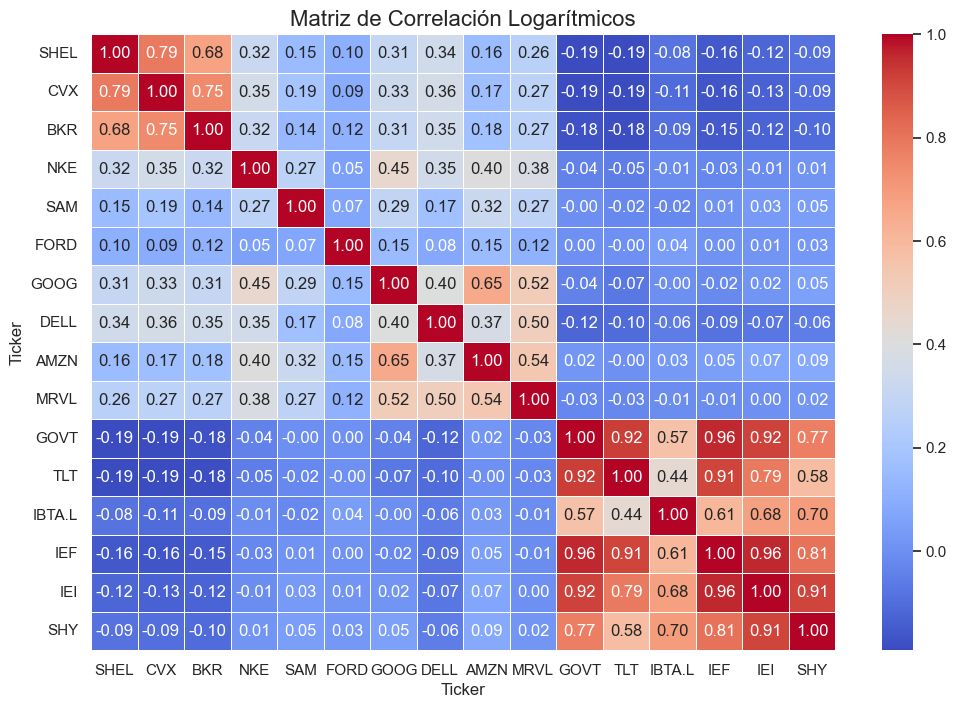

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = ret_assets.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personalizar el gráfico
plt.title("Matriz de Correlación Logarítmicos", fontsize=16)
plt.show()

Explicación:
ret_assets.corr(): Calcula la matriz de correlación entre los rendimientos logarítmicos de los activos.
sns.heatmap(): Crea un mapa de calor para visualizar la matriz de correlación.
annot=True: Muestra los valores numéricos en cada celda.
cmap="coolwarm": Define el esquema de colores.
fmt=".2f": Formato de los números (2 decimales).
linewidths=0.5: Define el grosor de las líneas entre celdas.
plt.figure(figsize=(12, 8)): Ajusta el tamaño del gráfico.
Este código generará un mapa de calor que muestra las correlaciones entre los rendimientos logarítmicos de los activos. ¿Te gustaría personalizar algo más?

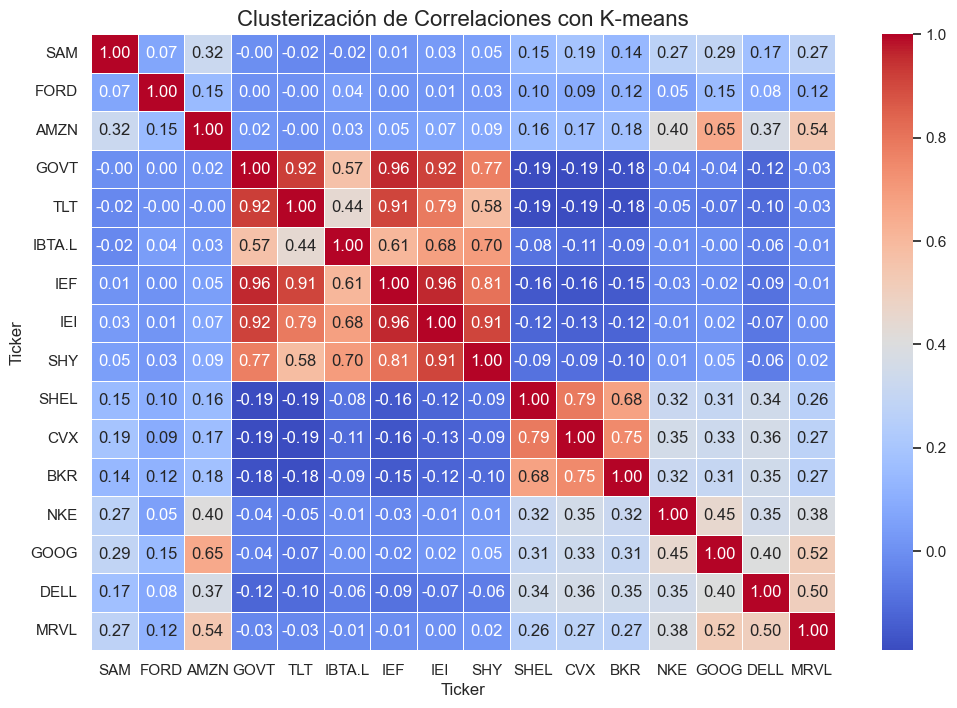

In [89]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = ret_assets.corr()

# Convertir la matriz de correlación en un array para K-means
correlation_array = correlation_matrix.values

# Aplicar K-means
n_clusters = 3  # Número de clusters deseados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(correlation_array)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Reordenar la matriz de correlación según los clusters
sorted_indices = np.argsort(labels)
sorted_correlation_matrix = correlation_matrix.iloc[sorted_indices, sorted_indices]

# Visualizar la matriz de correlación reordenada
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Clusterización de Correlaciones con K-means", fontsize=16)
plt.show()

CHECAMOS LAS ESTADISTICAS 

Donde mean = PRomedio diario del rendimiento
std= Es el riesgo diario del activo



In [90]:
ret_assets.describe()

Ticker,SHEL,CVX,BKR,NKE,SAM,FORD,GOOG,DELL,AMZN,MRVL,GOVT,TLT,IBTA.L,IEF,IEI,SHY
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1.286000e+03,1286.000000
mean,0.000177,0.000300,0.000480,-0.000200,-0.000170,-0.000539,0.000809,0.001194,0.000658,0.001111,-0.000030,-0.000247,0.000052,-0.000059,7.230369e-07,0.000048
std,0.023199,0.022246,0.027619,0.021739,0.028565,0.045230,0.020069,0.027238,0.022263,0.033633,0.003861,0.011096,0.001294,0.004914,2.903738e-03,0.001185
min,-0.188406,-0.250063,-0.251847,-0.222905,-0.301361,-0.314493,-0.117667,-0.196833,-0.151398,-0.158169,-0.022497,-0.069011,-0.007505,-0.025392,-1.124577e-02,-0.005101
25%,-0.010087,-0.009030,-0.013447,-0.009914,-0.012584,-0.020397,-0.009197,-0.010614,-0.010785,-0.017004,-0.002235,-0.007223,-0.000536,-0.002948,-1.425651e-03,-0.000464
50%,0.000221,0.000713,0.000414,-0.000081,0.000029,0.000000,0.002029,0.000696,0.000749,0.000729,0.000000,-0.000207,0.000000,-0.000086,0.000000e+00,0.000000
75%,0.010568,0.009592,0.013707,0.010467,0.011646,0.016837,0.011010,0.013971,0.012604,0.018757,0.002192,0.006087,0.000555,0.002588,1.338272e-03,0.000470
max,0.179647,0.204904,0.187133,0.144372,0.228351,0.429925,0.094994,0.274737,0.126949,0.280836,0.022325,0.072503,0.012074,0.026074,1.427664e-02,0.009925


In [91]:
ret_assets['SHY'].describe()

count    1286.000000
mean        0.000048
std         0.001185
min        -0.005101
25%        -0.000464
50%         0.000000
75%         0.000470
max         0.009925
Name: SHY, dtype: float64

1.-plt.hist(): Crea el histograma. El parámetro density=True normaliza el histograma para que represente una densidad de probabilidad.

2.-np.linspace(): Genera puntos equidistantes entre el mínimo y el máximo de los datos para la curva normal.

3.-norm.pdf(): Calcula la función de densidad de probabilidad (PDF) de una distribución normal con la media y desviación estándar de los datos.

4.-plt.plot(): Superpone la curva normal sobre el histograma.

5.-Personalización: Se agregan etiquetas, título y leyenda para mejorar la presentación.

# HISTOGRAMA
Un histograma es como un gráfico de barras que cuenta cosas. Imagina que tienes una caja llena de dulces de diferentes tamaños. Quieres saber cuántos dulces hay de cada tamaño. Entonces:

Divides los tamaños en grupos (por ejemplo, pequeños, medianos y grandes).
Cuentas cuántos dulces hay en cada grupo.
Dibujas una barra para cada grupo:
La barra es más alta si hay muchos dulces en ese grupo.
La barra es más baja si hay pocos dulces.
El histograma te ayuda a ver rápidamente cómo están distribuidos los tamaños de los dulces. En lugar de dulces, en matemáticas o programación, usamos números, como edades, precios o cualquier dato que queramos analizar.

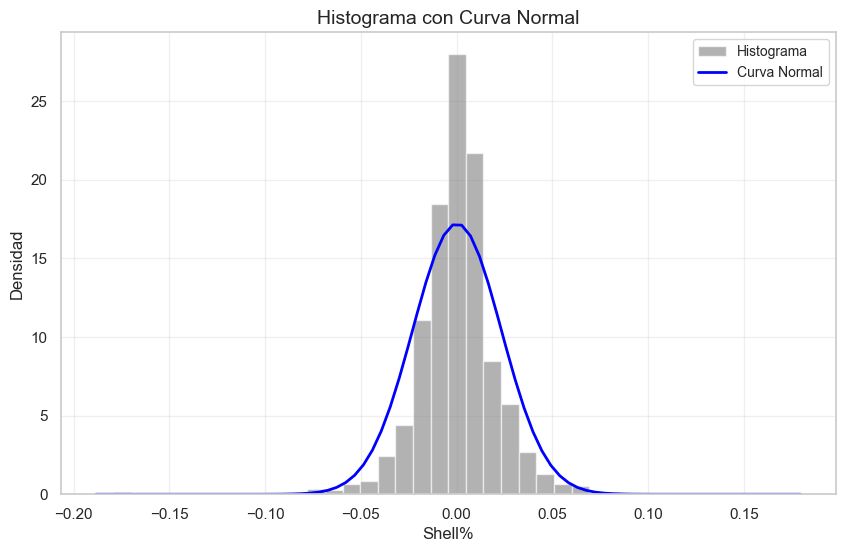

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de ejemplo (reemplaza con tus datos reales)
shell_data = ret_assets['SHEL']  # Columna de datos de Shell

# Crear el histograma
plt.figure(figsize=(10, 6))
hist_shell = plt.hist(shell_data, bins=40, density=True, alpha=0.6, color='gray', label='Histograma')

# Generar la curva normal
xfit = np.linspace(min(shell_data), max(shell_data), 80)
yfit = norm.pdf(xfit, loc=np.mean(shell_data), scale=np.std(shell_data))
plt.plot(xfit, yfit, color='blue', linewidth=2, label='Curva Normal')

# Personalizar el gráfico
plt.title("Histograma con Curva Normal", fontsize=14)
plt.xlabel("Shell%", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Análisis de series de tiempo

Pruebas de normalidad: Lilliefors
Pruebas en Shell

# Lilliefors prueba

Imagina que tienes una gran bolsa llena de canicas de muchos colores. Ahora, tú quieres saber si el color de las canicas está muy bien repartido de manera que sigan un patrón bonito, como cuando acomodas las canicas formando un arcoíris.

La prueba de Lilliefors es como un juego en el que miramos cómo están acomodadas las canicas y nos preguntamos:
"¿Esto parece un arcoíris perfecto, o están un poco desordenadas?"

En vez de colores, en la vida real usamos números (como la altura de las personas, las calificaciones de un examen, etc.). Y en vez de buscar un arcoíris, queremos saber si esos números siguen una forma especial llamada campana de Gauss o distribución normal (que es como una montañita simétrica, igual de alta de un lado que del otro).

Entonces, la prueba de Lilliefors hace esto:

Mira los números que tienes.

Calcula la campana que mejor se ajusta a esos números.

Compara tus números con esa campana.

Decide si tus números están suficientemente cerca de la forma de la campana o si están muy desordenados.

Si están cerca, decimos:
✅ "¡Sí, tus números parecen seguir una distribución normal!"

Si están muy diferentes, decimos:
❌ "No, tus números no siguen una distribución normal."

# Otra explicacion sencilla de Lilliefors 

Imagina que ahora tú eres un pequeño granjero y tienes que vender manzanas 🍎. Cada día, mides el peso de tus manzanas, porque quieres saber si tus manzanas son casi todas del mismo tamaño o si hay algunas muy raras (unas gigantes o unas muy chiquitas).

Ahora:

Si casi todas las manzanas pesan parecido y siguen una forma bonita (como la campana 🎯), es fácil predecir cuánto vas a ganar vendiéndolas.

Pero si pesan muy diferente, es difícil saber cuánto dinero vas a hacer.

Entonces, la prueba de Lilliefors ayuda a revisar si los pesos de tus manzanas se comportan de manera "normal" (siguiendo la famosa campana) o no.

En el mundo de las acciones 📈 funciona igual:

Cada acción (como una empresa de zapatos, tecnología o refrescos) sube y baja de precio todos los días.

Los inversionistas quieren saber si esos cambios son normales o muy locos.

Si siguen una forma normal (campana), entonces es más seguro hacer planes: saber si una acción es tranquila o muy volátil (loca).

Si no, hay más riesgo de perder dinero o ganar mucho de repente.

¿Por qué es importante?
Porque si sabes que los precios de una acción se comportan normal, puedes:

Calcular riesgos mejor. 🎯

Invertir de manera más inteligente. 🧠

Tomar mejores decisiones sobre dónde poner tu dinero. 💰

Si no revisas esto, sería como vender manzanas sin saber si son normales o raras... ¡y podrías perder mucho!

# APLICAMOS LA LILLIEFORS A SHEL

In [93]:
# APLICAMOS LA LILLIEFORS A SHEL

from statsmodels.stats.diagnostic import lilliefors

# Datos de ejemplo (reemplaza con tus datos reales)
shell_data = ret_assets['SHEL']  # Columna de datos de Shell

# Realizar la prueba de Lilliefors
stat, p_value = lilliefors(shell_data)

# Mostrar los resultados
print(f"Estadístico de Lilliefors: {stat}")
print(f"Valor p: {p_value}")

# Interpretación


if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: Los datos podrían seguir una distribución normal.")
    

#La hipotesis nula H0: los rendimientos se distribuyen como una Normal.
#La hipotesis alterna H1: los rendimientos NO se distribuyen como una Normal.

#Interpretación: si el p-value es mayor que 0.05 entonces NO se rechaza la H0; 
# si el p-value es menor que 0.05 entonces se rechaza la H0.
#Los rendimientos de SHELL no se distribuyen como una Normal.




Estadístico de Lilliefors: 0.09787306628406967
Valor p: 0.0009999999999998899
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


# Lilliefors funcion

lilliefors(shell_data):

Es una función de la biblioteca statsmodels que realiza la prueba de Lilliefors.
La prueba de Lilliefors es una versión modificada de la prueba de Kolmogorov-Smirnov que verifica si los datos siguen una distribución normal.
shell_data es el conjunto de datos que se está evaluando (en este caso, los rendimientos de Shell).

stat:

Es el estadístico de la prueba. Representa la distancia máxima entre la distribución acumulativa empírica de los datos y la distribución acumulativa teórica (normal).
Un valor más alto indica una mayor desviación de la normalidad.

p_value:

Es el valor p asociado a la prueba.
Si p_value < 0.05, se rechaza la hipótesis nula (los datos no siguen una distribución normal).
Si p_value >= 0.05, no se puede rechazar la hipótesis nula (los datos podrían seguir una distribución normal).


# APLICAMOS LILLIEFORS A FORD

In [94]:
# APLICAMOS LA LILLIEFORS A SHEL

from statsmodels.stats.diagnostic import lilliefors

# Datos de ejemplo (reemplaza con tus datos reales)
ford_data = ret_assets['FORD']  # Columna de datos de Shell

# Realizar la prueba de Lilliefors
stat, p_value = lilliefors(ford_data)

# Mostrar los resultados
print(f"Estadístico de Lilliefors: {stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: Los datos podrían seguir una distribución normal.")


Estadístico de Lilliefors: 0.11475074439575805
Valor p: 0.0009999999999998899
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


# PRUEBA DE ESTACIONARIEDAD - Dickey Fuller
Pruebas en Shell
La prueba se realiza sobre los rendimientos logarítmicos



Imagina que tienes un trenecito de juguete 🚂 que se mueve por una pista.

A veces el tren avanza derechito, como si nada cambiara mucho.

A veces el tren se vuelve loco: sube, baja, da vueltas, se cae...

Cuando estamos trabajando con series de datos (como los precios de una acción en la bolsa 📈 cada día), queremos saber:
👉 ¿Nuestro tren (los datos) va derechito o se vuelve loco?

La prueba de Dickey-Fuller es un juego para revisar eso:

Si el tren va más o menos derecho, aunque suba y baje un poquito, decimos que es estacionario (¡bien! ✅).

Si el tren se va para cualquier lado sin control, decimos que no es estacionario (¡cuidado! ❌).

¿Qué significa "estacionario"?
Que los datos no cambian mucho su comportamiento con el tiempo.
Por ejemplo:

La media (el "promedio") se mantiene más o menos igual.

La varianza (qué tanto se separan los datos) también es parecida todo el tiempo.

¿Y por qué importa?
Porque cuando los datos son estacionarios, podemos predecir mejor qué va a pasar mañana.
Pero si no son estacionarios, es como tratar de adivinar dónde va a saltar un conejo 🐇... ¡muy difícil!

Entonces la prueba de Dickey-Fuller hace esto:

Mira tus datos (como el precio de una acción).

Pregunta: "¿Se comportan de manera tranquila (estacionaria) o están muy locos (no estacionaria)?"

Te da una respuesta para saber si puedes usar modelos matemáticos normales o necesitas hacer arreglos especiales.

In [95]:
from statsmodels.tsa.stattools import adfuller

# Datos de ejemplo (reemplaza con tus datos reales)
shell_data = ret_assets['SHEL']  # Columna de datos de Shell

# Realizar la prueba de Dickey-Fuller
adf_result = adfuller(shell_data, autolag='AIC')

# Mostrar los resultados
print("Estadístico de prueba ADF:", adf_result[0])
print("Valor p:", adf_result[1])
print("Número de rezagos utilizados:", adf_result[2])
print("Número de observaciones:", adf_result[3])
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretación
if adf_result[1] < 0.05:
    print("Rechazamos la hipótesis nula: La serie es estacionaria.")
else:
    print("No se rechaza la hipótesis nula: La serie no es estacionaria.")

Estadístico de prueba ADF: -12.618294146608712
Valor p: 1.5988304521678962e-23
Número de rezagos utilizados: 7
Número de observaciones: 1278
Valores críticos:
   1%: -3.4354771386691763
   5%: -2.8638041921002126
   10%: -2.5679754757164095
Rechazamos la hipótesis nula: La serie es estacionaria.


adfuller(shell_data):

Realiza la prueba de Dickey-Fuller aumentada para verificar si una serie temporal es estacionaria.
La hipótesis nula (H0) es que la serie no es estacionaria (tiene una raíz unitaria).
Si el valor p (adf_result[1]) es menor a 0.05, se rechaza H0, indicando que la serie es estacionaria.
Resultados devueltos por adfuller:

adf_result[0]: Estadístico de la prueba ADF.
adf_result[1]: Valor p.
adf_result[2]: Número de rezagos utilizados en la prueba.
adf_result[3]: Número de observaciones utilizadas.
adf_result[4]: Valores críticos para diferentes niveles de significancia (1%, 5%, 10%).
Interpretación:

Si el valor p es menor a 0.05, la serie es estacionaria.
Si el valor p es mayor o igual a 0.05, la serie no es estacionaria.

1. "Test regression none"
👶 Esto te dice:
"Hice la prueba sin poner constantes ni pendientes" (como tú lo pediste en type = "none").

2. "Coefficients"
👶 Aquí ves cuánto "empujan" los datos hacia la media:

Estimate (-0.09543):
Te dice cuánto tus datos tratan de regresar hacia el centro (cero).
Negativo es buena señal si quieres estacionariedad.

Std. Error:
Es el "error" que puede tener esa estimación.

t value:
Es como decir "qué tan fuerte es la prueba".
Más negativo ➔ mejor para encontrar estacionariedad.

Pr(>|t|):
Es el p-valor.

Si es muy chiquito (por ejemplo menos de 0.05), ganas y puedes decir:
"¡Los datos son estacionarios!" 🎯

Si es grande (mayor a 0.05), entonces no puedes decir que es estacionario.

3. "Test-statistic o Estadistico de Prueba"
👶 Este numerito (por ejemplo -3.427) es súper importante:

Es el resultado final de la prueba Dickey-Fuller.

Debes compararlo contra los "Valores Criticos".

4. "Valores Criticos"
👶 Estos números (-2.58, -1.95, -1.62) son como líneas de meta 🏁:

Si tu Test-statistic (-3.427) es más pequeño (más negativo) que el critical value de 1%, 5% o 10%...

Ganas y puedes decir que los datos son estacionarios ✅.

Resumen del ejemplo:
Test-statistic = -3.427

Critical value para 5% = -1.95

-3.427 < -1.95, entonces:
✅ ¡Tus datos son estacionarios!

¡Bieeen! 🎉

Así que el proceso es:

Miras el Test-statistic.

Lo comparas con los critical values.

Si es más chiquito, sí hay estacionariedad.

Si no, no hay estacionariedad.


# EMPEZAMOS CON LA CONSTRUCCION DEL PORTAFOLIO  

Rendimiento y riesgo del portafolio
Rendimiento del portafolio



# PROMEDIO DE RENDIMIENTOS DE CADA UNA DE LAS ACCIONES DIARIAS PORTAFOLIO

In [96]:

portafolio=['SHEL','NKE','FORD','SAM','GOVT']
assets=ret_assets[portafolio]
media_1=assets.mean()
print(media_1['SHEL'])

media_1



0.0001774731408784289


Ticker
SHEL    0.000177
NKE    -0.000200
FORD   -0.000539
SAM    -0.000170
GOVT   -0.000030
dtype: float64

# VARIANZA DE CADA ACCION (NO TIENE INTERPRETACION)

In [97]:
varianza_1=assets.var()

varianza_1.head()

Ticker
SHEL    0.000538
NKE     0.000473
FORD    0.002046
SAM     0.000816
GOVT    0.000015
dtype: float64

# DESVIACION ESTANDAR (RIESGO DE LA ACCION) DE CADA UNA DE LAS ACCIONES

In [98]:
desviacion_1=assets.std()

desviacion_1.head()

Ticker
SHEL    0.023199
NKE     0.021739
FORD    0.045230
SAM     0.028565
GOVT    0.003861
dtype: float64

In [99]:
#for i in media_1.index:
#    print(f"El rendimiento medio de {i} es: {media_1[i]}")
    
Exceso=assets.copy()

print('ACCIONES')
print(Exceso.head())

print('PROMEDIOS')
print(media_1.head())


# Mostrar los primeros valores después de la operación
print(Exceso['SHEL'].head())



ACCIONES
Ticker          SHEL       NKE      FORD       SAM      GOVT
Date                                                        
2020-01-03  0.007836 -0.002743 -0.009950 -0.009258  0.004990
2020-01-06  0.012380 -0.000884  0.029559  0.010470 -0.001150
2020-01-07 -0.009229 -0.000491 -0.009756  0.006198 -0.001918
2020-01-08 -0.011825 -0.002262  0.009756 -0.001338 -0.001537
2020-01-09 -0.000167 -0.000690  0.009662 -0.010500  0.000769
PROMEDIOS
Ticker
SHEL    0.000177
NKE    -0.000200
FORD   -0.000539
SAM    -0.000170
GOVT   -0.000030
dtype: float64
Date
2020-01-03    0.007836
2020-01-06    0.012380
2020-01-07   -0.009229
2020-01-08   -0.011825
2020-01-09   -0.000167
Name: SHEL, dtype: float64


# MEDIA O PREDIO RENDIMIENTO DIARIO DE CADA ACCION

In [100]:
#Promedio del rendimiento de la accion diario
media_1.head()

Ticker
SHEL    0.000177
NKE    -0.000200
FORD   -0.000539
SAM    -0.000170
GOVT   -0.000030
dtype: float64

In [101]:
Exceso.head()

Ticker,SHEL,NKE,FORD,SAM,GOVT
Date,,,,,
2020-01-03,0.007836,-0.002743,-0.009950,-0.009258,0.004990
2020-01-06,0.012380,-0.000884,0.029559,0.010470,-0.001150
2020-01-07,-0.009229,-0.000491,-0.009756,0.006198,-0.001918
2020-01-08,-0.011825,-0.002262,0.009756,-0.001338,-0.001537
2020-01-09,-0.000167,-0.000690,0.009662,-0.010500,0.000769


# OBTENEMOS LOS EXCESOS

In [102]:
for i in Exceso.columns:
    print(i)
    # Restar el valor a todas las filas de la columna
    Exceso[i]=Exceso[i]-media_1[i] 
    
Exceso.head()
    


SHEL
NKE
FORD
SAM
GOVT


Ticker,SHEL,NKE,FORD,SAM,GOVT
Date,,,,,
2020-01-03,0.007659,-0.002544,-0.009411,-0.009088,0.005020
2020-01-06,0.012202,-0.000684,0.030098,0.010640,-0.001120
2020-01-07,-0.009406,-0.000292,-0.009217,0.006368,-0.001888
2020-01-08,-0.012002,-0.002062,0.010295,-0.001168,-0.001507
2020-01-09,-0.000345,-0.000490,0.010201,-0.010330,0.000799


# CALCULAMOS LA CORRLACION DE LOS ACTIVOS DE PORTAFOLIO DE 5 ACTIVOS


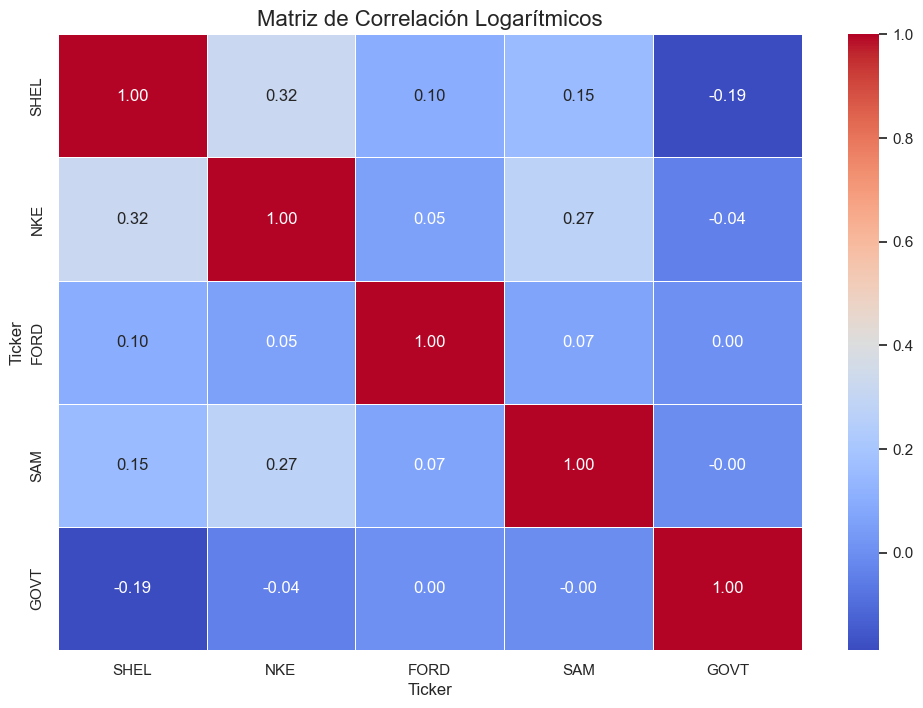

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = assets.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personalizar el gráfico
plt.title("Matriz de Correlación Logarítmicos", fontsize=16)
plt.show()

# CALCULAMOS LA MATRIZ DE VARIANZA-COVARIANZA DE FORMA INDIRECTA CON MULTIPLICACION DE MATRICES Y TRANSPUESTA 



In [104]:
Numero_de_muestras=assets['SHEL']

PRUEBA=assets['SHEL']

N=len(Numero_de_muestras.values)



In [105]:
# Convertir Exceso a un array de numpy

exceso_array = Exceso.values

print(len(exceso_array))

# Multiplicar la matriz Exceso por su transpuesta

resultado = np.dot(exceso_array,exceso_array.T)

N=len(exceso_array)

resultado = (resultado)/(N-1)

# Reconstruir el DataFrame con los nombres originales
resultado_df = pd.DataFrame(resultado, index=Exceso.columns, columns=Exceso.columns)

# Mostrar el resultado
print(resultado_df)

resultado_df

1286


ValueError: Shape of passed values is (1286, 1286), indices imply (5, 5)

# CALCULAMOS LA MATRIZ DE VARIANZA-COVARIANZA DE FORMA DIRECTA


In [110]:
# Calcular la matriz de varianza-covarianza
matriz_varianza_covarianza = assets.cov()

# Mostrar la matriz
print(matriz_varianza_covarianza)

Ticker      SHEL       NKE          FORD           SAM          GOVT
Ticker                                                              
SHEL    0.000538  0.000161  1.087557e-04  1.008152e-04 -1.686435e-05
NKE     0.000161  0.000473  5.308424e-05  1.692463e-04 -3.436316e-06
FORD    0.000109  0.000053  2.045785e-03  8.965180e-05  4.107175e-07
SAM     0.000101  0.000169  8.965180e-05  8.159586e-04 -3.021040e-07
GOVT   -0.000017 -0.000003  4.107175e-07 -3.021040e-07  1.490680e-05


# Generamos un vector de pesos

In [131]:
import numpy as np
#w = np.random.rand(5)
#print(w)
#w=w/np.sum(w)
#print(w)


#Usamos los pesos de R
w=np.array([0.05242050,0.15946259,0.32526728,0.36634431,0.09650532])

w

array([0.0524205 , 0.15946259, 0.32526728, 0.36634431, 0.09650532])

#PARA OBTENER LA DESVIACION ESTANDAR (RIESOGO DEL PORTAFOLIO)

La desviación estándar de un portafolio de 
𝑁
N activos es simplemente la raíz cuadrada de la varianza del portafolio.

📌 Fórmula:

𝜎=𝑤⊤*𝛴*𝑤

​
Donde:

σ  desviación estándar del portafolio (riesgo total)

w: vector de pesos 

Σ: matriz de varianza-covarianza de los activos

La desviación estándar se interpreta como la volatilidad o riesgo total del portafolio, considerando tanto el riesgo individual de cada activo como su correlación con los demás.




In [ ]:
matriz_varianza_covarianza_array=np.array(matriz_varianza_covarianza)


Varianza=np.dot(w.T,np.dot(matriz_varianza_covarianza_array,w))

Desv_port=np.sqrt(Varianza)

print("El riesgo de tu portafolio Diario es de:",Desv_port)

#Calculamos las desviacion estandar (RIESGO) el riesgo anualizado del portafolio


Desv_port_anual=100*(Desv_port*np.sqrt(252))

print("El riesgo de tu portafolio anual es de %",Desv_port_anual)



rendimiento_portafolio = ((1 + np.dot(assets.mean().values, w)) ** 252) - 1
print("Rendimiento anualizado del portafolio:",rendimiento_portafolio)


# Calcular el rendimiento anualizado del portafolio FORMA CORRECTA
rendimiento_portafolio_correcta = ((1 + np.dot(assets.mean().values, w)) ** 252) - 1
print("Rendimiento anualizado del portafolio:",rendimiento_portafolio_correcta)





El riesgo de tu portafolio Diario es de: 0.01990557802879022
El riesgo de tu portafolio anual es de % 31.599125500302144
Rendimiento anualizado del portafolio: -0.06415756580436249
